In [2]:
import necstdb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [3]:
datapath_sky = "./necst_rsky_20240817_200332"
datapath_hot = "./rsky_hot"
db = necstdb.opendb(datapath_sky)
#data_altaz = db.open_table("necst-NANTEN2-ctrl-antenna-altaz").read(astype="pandas").set_index("time")
#data_encoder = db.open_table("necst-NANTEN2-ctrl-antenna-encoder").read(astype="pandas").set_index("time")

In [4]:
topic_names = [f'necst-NANTEN2-data-spectral-board{i+1}' for i in range(15)]

In [5]:
specs = [db.open_table(topic).read(astype="array") for topic in topic_names]

In [6]:
hot_list = []
sky_list = []
for spec in specs:
    hot = np.nanmean(spec["data"][spec["position"] == b'HOT     '], axis=0)
    sky = np.nanmean(spec["data"][spec["position"] == b'SKY     '], axis=0)
    hot_list.append(hot)
    sky_list.append(sky)

In [7]:
sky_averages = sky_list
hot_averages = hot_list
yfacs = [(hot / sky) for hot, sky in zip(hot_averages, sky_averages)]
tsyss = [290. / (yfac - 1.0) for yfac in yfacs]

ifs = ["2LL", "2RU", "2RL", "3LU", "3LL", "3RU", "3RL", "4LU", "4LL", "1LU", "2LU", "5LU", "5LL", "5RU", "5RL"]

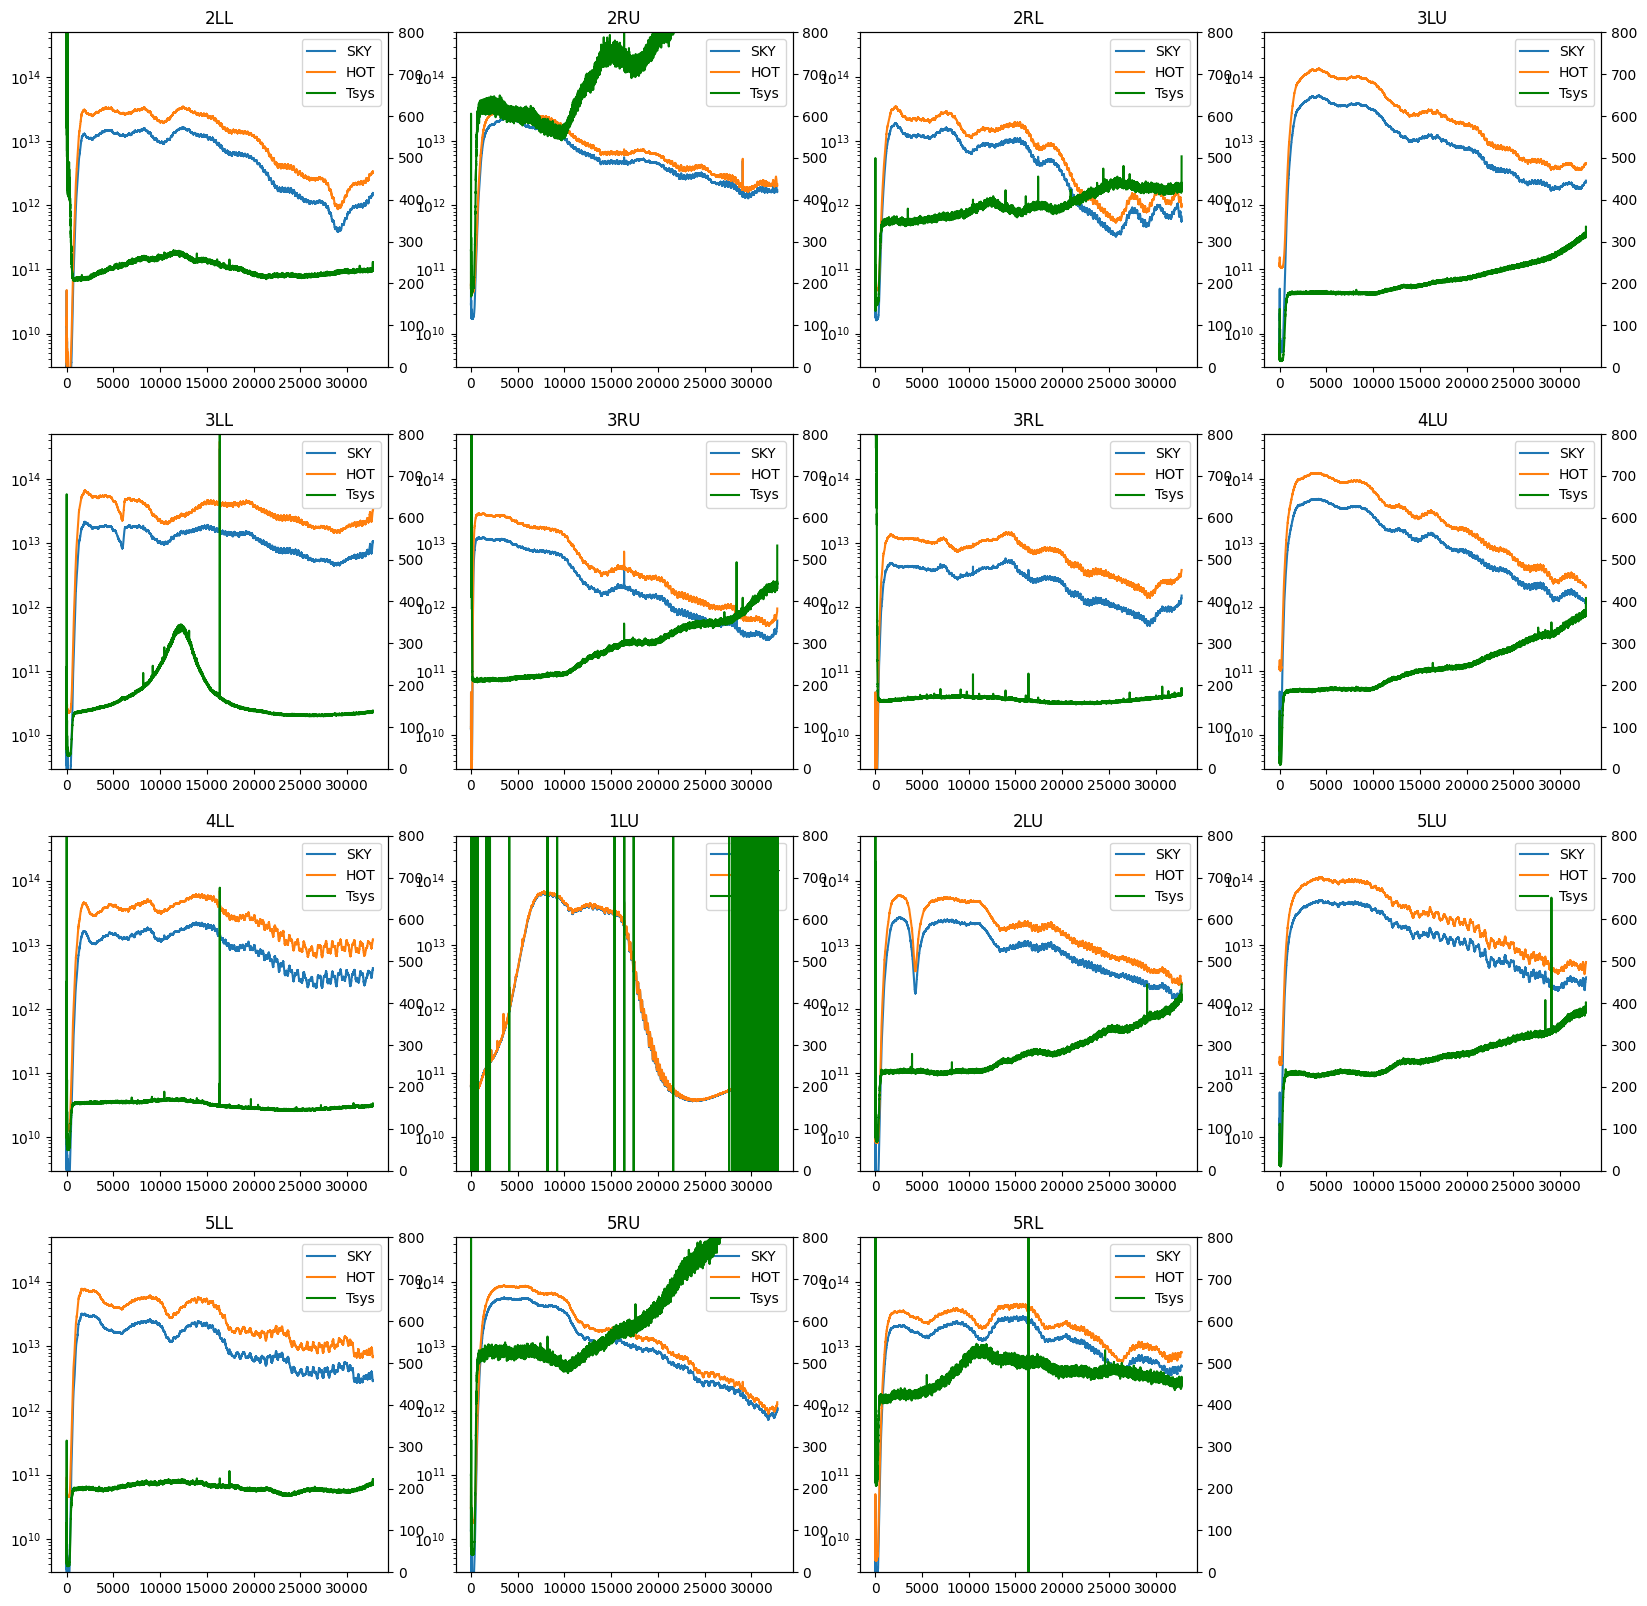

In [8]:
fig = plt.figure(figsize=(20,20))
axes = [fig.add_subplot(4,4,i+1) for i in range(15)]
lns_sky = [ax.plot(sky_average, label="SKY") for ax, sky_average in zip(axes, sky_averages)]
lns_hot = [ax.plot(hot_average, label="HOT") for ax, hot_average in zip(axes, hot_averages)]
#[ax.legend() for ax in axes]
[ax.set_ylim(3e9, 5e14) for ax in axes]
[ax.set_yscale("log") for ax in axes]
[ax.set_title(txt) for ax, txt in zip(axes, ifs)]
axes_twins = [ax.twinx() for ax in axes]
lns_tsys = [ax.plot(tsys, color="green", label="Tsys") for ax, tsys in zip(axes_twins, tsyss)]
[ax.set_ylim(0, 800) for ax in axes_twins]

lns = [ln_sky+ln_hot+ln_tsys for ln_sky, ln_hot, ln_tsys in zip(lns_sky, lns_hot, lns_tsys)]

for ax, ln in zip(axes, lns):
    labs = [l.get_label() for l in ln]
    ax.legend(ln, labs, loc=0)

fig.savefig("necst_rsky_20240816_205924.pdf", bbox_inches="tight")